# Azure Content Safety for text and images

In [1]:
# %pip install azure-ai-contentsafety

In [2]:
import datetime
import os
import sys

from azure.ai.contentsafety import ContentSafetyClient
from azure.ai.contentsafety.models import (
    AnalyzeImageOptions,
    ImageData,
    AnalyzeTextOptions,
)
from azure.core.credentials import AzureKeyCredential
from azure.core.exceptions import HttpResponseError
from IPython.display import Image

In [3]:
sys.version

'3.10.10 (main, Mar 21 2023, 18:45:11) [GCC 11.2.0]'

In [4]:
print('Today is:', datetime.datetime.today().strftime ('%d-%b-%Y %H:%M:%S'))

Today is: 21-Sep-2023 08:19:42


## Azure Content Safety for images

In [5]:
# Azure Content Safety credentials

endpoint = "tobereplaced"
key = "tobereplaced"

In [6]:
def analyze_image(image_path):
    # Create an Content Safety client
    client = ContentSafetyClient(endpoint, AzureKeyCredential(key))

    # Build request
    with open(image_path, "rb") as file:
        my_file = file.read()
    # Analyze image
    try:
        response = client.analyze_image(
            AnalyzeImageOptions(image=ImageData(content=my_file))
        )
        print(response)
        print()

    except Exception as e:
        print("Error code: {}".format(e.error.code))
        print("Error message: {}".format(e.error.message))
        return

    if response.hate_result is not None:
        print("Hate severity score = {}".format(response.hate_result.severity))
    if response.self_harm_result is not None:
        print("SelfHarm severity score = {}".format(response.self_harm_result.severity))
    if response.sexual_result is not None:
        print("Sexual severity score = {}".format(response.sexual_result.severity))
    if response.violence_result is not None:
        print("Violence severity score = {}".format(response.violence_result.severity))

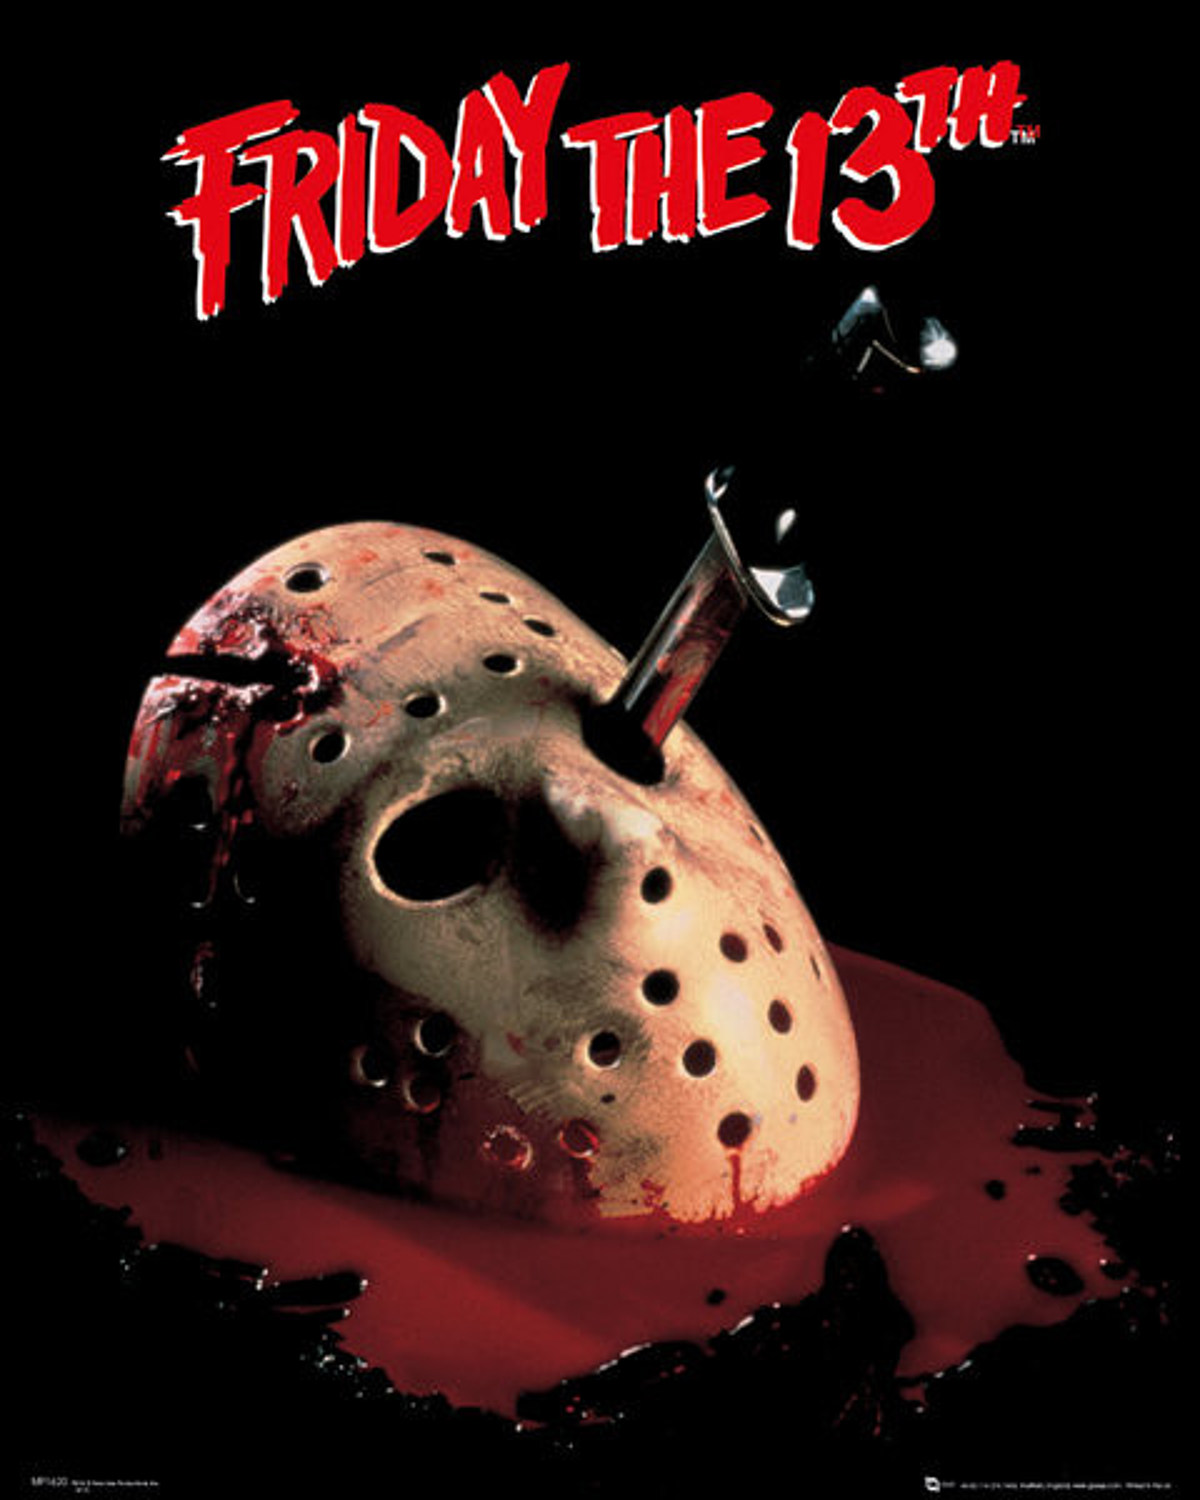

In [7]:
image_path = "image1.jpg"

Image(filename=image_path, width=480)

In [8]:
analyze_image(image_path)

{'hateResult': {'category': 'Hate', 'severity': 0}, 'selfHarmResult': {'category': 'SelfHarm', 'severity': 0}, 'sexualResult': {'category': 'Sexual', 'severity': 0}, 'violenceResult': {'category': 'Violence', 'severity': 2}}

Hate severity score = 0
SelfHarm severity score = 0
Sexual severity score = 0
Violence severity score = 2


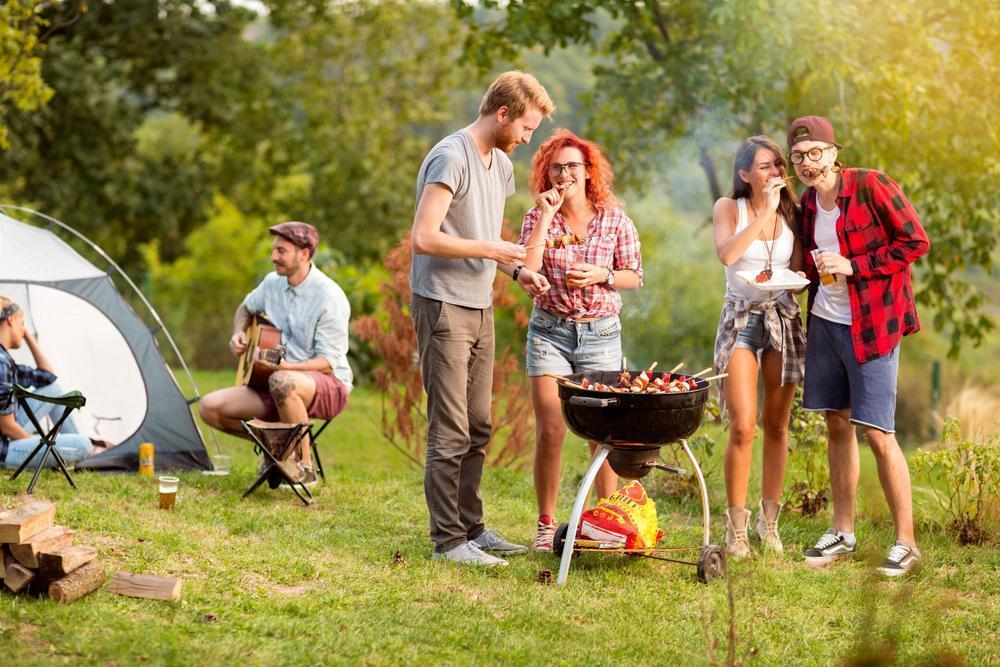

In [9]:
image_path = "image2.jpg"

Image(filename=image_path, width=480)

In [10]:
analyze_image(image_path)

{'hateResult': {'category': 'Hate', 'severity': 0}, 'selfHarmResult': {'category': 'SelfHarm', 'severity': 0}, 'sexualResult': {'category': 'Sexual', 'severity': 0}, 'violenceResult': {'category': 'Violence', 'severity': 0}}

Hate severity score = 0
SelfHarm severity score = 0
Sexual severity score = 0
Violence severity score = 0


## Azure Content Safety for text

In [11]:
def analyze_text(prompt):
    # analyze text
    # Create an Content Safety client
    client = ContentSafetyClient(endpoint, AzureKeyCredential(key))

    # Contruct request
    request = AnalyzeTextOptions(text=prompt)

    # Analyze text
    try:
        response = client.analyze_text(request)
        print(response)
        print()

    except HttpResponseError as e:
        print("Analyze text failed.")
        if e.error:
            print(f"Error code: {e.error.code}")
            print(f"Error message: {e.error.message}")
            raise
        print(e)
        raise

    if response.hate_result:
        print(f"Hate severity score = {response.hate_result.severity}")
    if response.self_harm_result:
        print(f"SelfHarm severity score = {response.self_harm_result.severity}")
    if response.sexual_result:
        print(f"Sexual severity score = {response.sexual_result.severity}")
    if response.violence_result:
        print(f"Violence severity score = {response.violence_result.severity}")

In [12]:
analyze_text("Hello")

{'blocklistsMatchResults': [], 'hateResult': {'category': 'Hate', 'severity': 0}, 'selfHarmResult': {'category': 'SelfHarm', 'severity': 0}, 'sexualResult': {'category': 'Sexual', 'severity': 0}, 'violenceResult': {'category': 'Violence', 'severity': 0}}

Hate severity score = 0
SelfHarm severity score = 0
Sexual severity score = 0
Violence severity score = 0


In [15]:
analyze_text("Painfully twist his arm then punch him in the face")

{'blocklistsMatchResults': [], 'hateResult': {'category': 'Hate', 'severity': 0}, 'selfHarmResult': {'category': 'SelfHarm', 'severity': 0}, 'sexualResult': {'category': 'Sexual', 'severity': 0}, 'violenceResult': {'category': 'Violence', 'severity': 4}}

Hate severity score = 0
SelfHarm severity score = 0
Sexual severity score = 0
Violence severity score = 4
